# Written By David Benisty

In [1]:
import numpy as np
from numpy import pi, log, sqrt, power

# load Cosmic Chronometers dataset
ccData = np.genfromtxt("CC.txt")
print(ccData)

[[7.0000e-02 6.9000e+01 1.9600e+01]
 [4.7830e-01 8.0900e+01 9.0000e+00]
 [9.0000e-02 6.9000e+01 1.2000e+01]
 [4.8000e-01 9.7000e+01 6.2000e+01]
 [1.2000e-01 6.8600e+01 2.6200e+01]
 [5.9300e-01 1.0400e+02 1.3000e+01]
 [1.7000e-01 8.3000e+01 8.0000e+00]
 [6.8000e-01 9.2000e+01 8.0000e+00]
 [1.7900e-01 7.5000e+01 4.0000e+00]
 [7.8100e-01 1.0500e+02 1.2000e+01]
 [1.9900e-01 7.5000e+01 5.0000e+00]
 [8.7500e-01 1.2500e+02 1.7000e+01]
 [2.0000e-01 7.2900e+01 2.9600e+01]
 [8.8000e-01 9.0000e+01 4.0000e+01]
 [2.7000e-01 7.7000e+01 1.4000e+01]
 [9.0000e-01 1.1700e+02 2.3000e+01]
 [2.8000e-01 8.8800e+01 3.6600e+01]
 [1.0370e+00 1.5400e+02 2.0000e+01]
 [1.3000e+00 1.6800e+02 1.7000e+01]
 [3.8020e-01 8.3000e+01 1.3500e+01]
 [1.3630e+00 1.6000e+02 3.3600e+01]
 [4.0000e-01 9.5000e+01 1.7000e+01]
 [1.4300e+00 1.7700e+02 1.8000e+01]
 [4.0040e-01 7.7000e+01 1.0200e+01]
 [1.5300e+00 1.4000e+02 1.4000e+01]
 [4.2470e-01 8.7100e+01 1.1200e+01]
 [1.7500e+00 2.0200e+02 4.0000e+01]
 [4.4497e-01 9.2800e+01 1.29

In [2]:
def H(theta,x):
    H0, Om, Ol = theta
    return H0*np.sqrt(Om*(1+x)**3 + Ol + (1-Om-Ol)*(1+x)**4)

def lnlikeCC(theta):
    H0, Om, Ol = theta
    chi2 = 0
    for j in range(len(ccData[:,0])):
        chi2 += ((H(theta,ccData[j,0]) - ccData[j,1])/ccData[j,2])**2
    return -chi2, [chi2, chi2/(len(ccData[:,0]) - len(theta)),(1- Om - Ol)]

In [10]:
import pypolychord
from pypolychord.settings import PolyChordSettings
from pypolychord.priors import UniformPrior, GaussianPrior

def unipriorLCDM(hypercube):
    prior = []
    prior.append(UniformPrior(50,100)(hypercube[0]))
    prior.append(UniformPrior(0.,1.)(hypercube[1]))
    prior.append(UniformPrior(0.,1.-hypercube[1])(hypercube[2]))
    return prior

runs = 100

def dumper(live, dead, logweights, logZ, logZerr):
    print("Last dead point:", dead[-1])

In [11]:
settings = PolyChordSettings(3,3)
settings.file_root = 'CCun'
settings.nlive = runs
settings.do_clustering = True
settings.read_resume = False

In [12]:
outputCC = pypolychord.run_polychord(lnlikeCC, 3, 3, settings, unipriorLCDM, dumper)

('Last dead point:', array([ 5.53985087e+01,  4.74201117e-01,  9.22099238e-02,  2.41684581e+02,
        9.29556080e+00,  4.33588959e-01, -1.07041038e+03, -2.41684581e+02]))
('Last dead point:', array([ 5.48787807e+01,  1.79788413e-01,  7.34783942e-01,  7.44390377e+01,
        2.86303991e+00,  8.54276458e-02, -3.18461726e+02, -7.44390377e+01]))
('Last dead point:', array([  63.39954706,    0.26507184,    0.58861858,   44.09018401,
          1.69577631,    0.14630958, -116.79108258,  -44.09018401]))
('Last dead point:', array([ 59.13611025,   0.22523145,   0.6422122 ,  29.92204967,
         1.15084806,   0.13255635, -35.99382568, -29.92204967]))
('Last dead point:', array([ 66.27876875,   0.21863875,   0.68695388,  22.26132731,
         0.8562049 ,   0.09440738, -44.69594372, -22.26132731]))
('Last dead point:', array([ 6.31487076e+01,  3.48175335e-01,  6.36276595e-01,  1.82692313e+01,
        7.02662743e-01,  1.55480692e-02, -2.16744089e+01, -1.82692313e+01]))
('Last dead point:', array

In [13]:
paramnamesLCDM = [('h0','H_0 (km/sec/Mpc)' ),('Om', '\Omega_m'), ('ol', r'\Omega_\Lambda'),('chi','chi'),('L',r'L'),('or', r'\Omega_r')]
outputCC.make_paramnames_files(paramnamesLCDM)
posteriorCC = outputCC.posterior

chains/CCun.txt
Removed no burn in


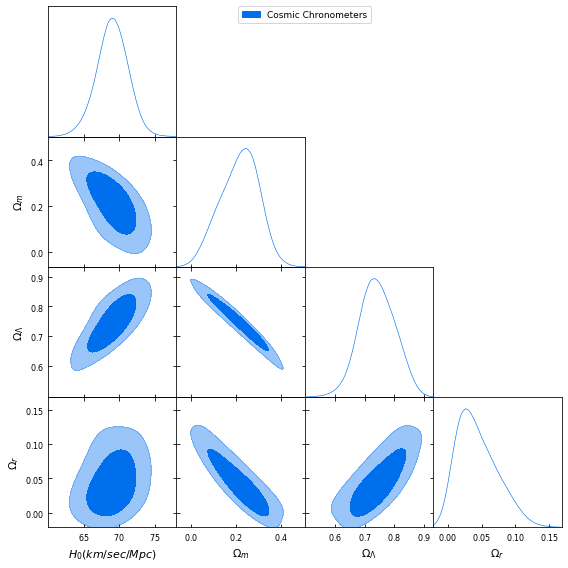

In [14]:
import getdist
from getdist import plots, MCSamples
%matplotlib inline

g = getdist.plots.getSubplotPlotter()
g.triangle_plot([posteriorCC], ('h0','Om','ol','or') ,filled=True, legend_labels=[r'Cosmic Chronometers'])
g.export("cor.eps")

In [15]:
outputCC

Global evidence:
log(Z)    -22.006465 +/-  0.250840

Local evidences:
log(Z_1)    -51.110534 +/-  0.805915
log(Z_2)    -26.499595 +/-  0.326337
log(Z_3)    -25.069583 +/-  0.352388
log(Z_4)    -25.223221 +/-  0.282082
log(Z_5)    -22.112182 +/-  0.252050

Run-time information:
<nlike>       [0.0]
ncluster          5
ndead          1536
nequals         128
nlike         80170
nlive             0
nposterior     1536

Parameter estimates:
h0   H_0 (km/sec/Mpc)    6.891E+01 +\- 2.057E+00
Om   \Omega_m            2.153E-01 +\- 7.910E-02
ol   \Omega_\Lambda      7.412E-01 +\- 5.521E-02
chi  chi                 1.565E+01 +\- 1.077E+00
L    L                   6.020E-01 +\- 4.141E-02
or   \Omega_r            4.351E-02 +\- 2.997E-02

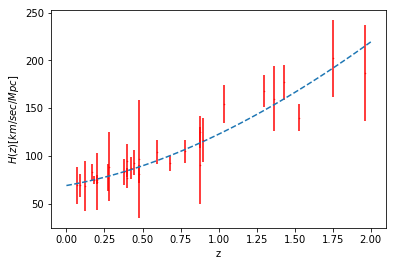

In [16]:
import matplotlib.pyplot as plt

zz = np.linspace(0,2,100)
plt.plot(zz, H([68.92,0.2147,0.7410],zz),'--')

plt.errorbar(ccData[:,0], ccData[:,1], ccData[:,2], fmt='r.', markersize=1,label = 'observations')
plt.xlabel('z')
plt.ylabel('$H(z) [km/sec/Mpc]$')
plt.savefig('finalPlot.eps')